In [1]:
# Step 1: Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure that 'Test.csv' is in your working directory)
df = pd.read_csv('Test.csv')

# Display the first few rows to verify the data is loaded correctly
print("Dataset Preview:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check the distribution of sentiment labels if the column exists
if 'sentiment' in df.columns:
    print("\nSentiment Distribution:")
    print(df['sentiment'].value_counts())
else:
    print("\nColumn 'sentiment' not found. Please verify the column names in your dataset:")
    print(df.columns)


Dataset Preview:
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB
None

Column 'sentiment' not found. Please verify the column names in your dataset:
Index(['text', 'label'], dtype='object')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Cleaned Texts:
                                                text  \
0  I always wrote this series off as being a comp...   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...   
2  This movie was so poorly written and directed ...   
3  The most interesting thing about Miryang (Secr...   
4  when i first read about "berlin am meer" i did...   

                                          clean_text  
0  always wrote series complete stinkfest jim bel...  
1  st watched dirsteve purcell typical mary kate ...  
2  movie poorly written directed fell asleep minu...  
3  interesting thing miryang secret sunshine acto...  
4  first read berlin meer didnt expect much thoug...  


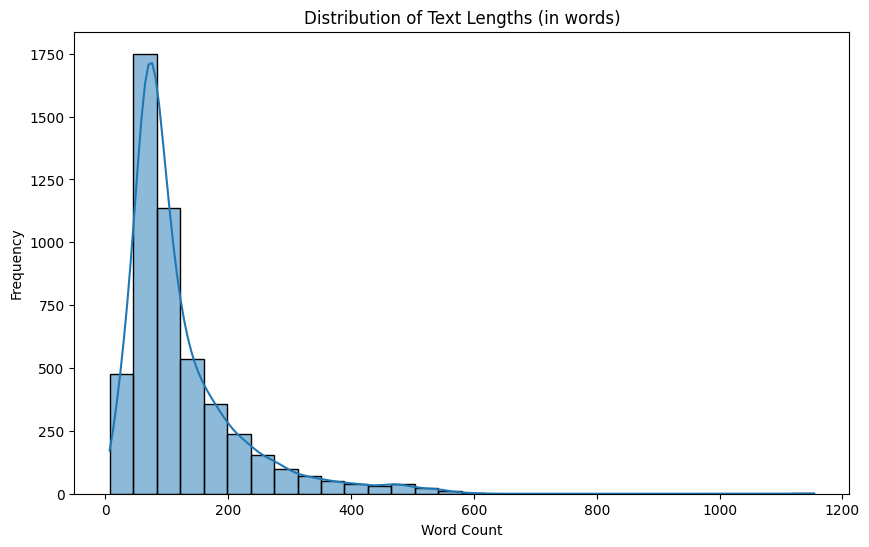


Label Distribution:
label
1    2505
0    2495
Name: count, dtype: int64


In [12]:
# Step 2: Data Cleaning, Preprocessing, and Exploratory Analysis

import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a function to clean text data
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation using str.translate
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits using regex
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply the cleaning function to the 'text' column and create a new column 'clean_text'
df['clean_text'] = df['text'].apply(clean_text)

# Display a few examples to verify the cleaning process
print("Sample Cleaned Texts:")
print(df[['text', 'clean_text']].head())

# Create a new column for text length (in terms of word count) for EDA
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot the distribution of text lengths
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Check the distribution of labels in the dataset
print("\nLabel Distribution:")
print(df['label'].value_counts())


Test Accuracy: 86.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       503
           1       0.86      0.88      0.87       497

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



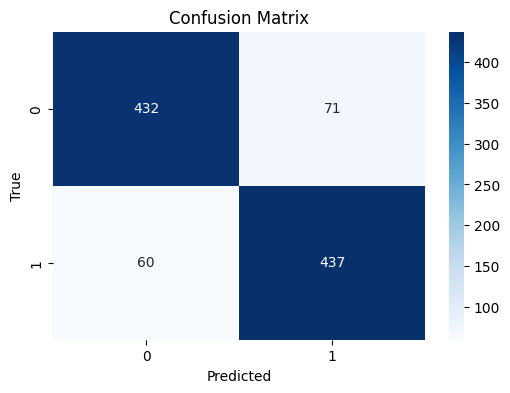

In [3]:
# Step 3: Feature Extraction, Train/Test Split, and Baseline Model Training

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets (80% train, 20% test)
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer (limiting to top 5000 features)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train a Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict sentiments on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Step 4: Custom Input Testing

# Define a function to predict sentiment for a given text
def predict_sentiment(text):
    # Clean the input text using the previously defined clean_text function
    cleaned = clean_text(text)
    # Transform the cleaned text into TF-IDF features
    vec = vectorizer.transform([cleaned])
    # Predict the sentiment using the trained model
    prediction = model.predict(vec)[0]
    # Get the prediction confidence (probability of the predicted class)
    confidence = model.predict_proba(vec).max()
    # Map numeric labels to human-readable labels
    label_map = {0: "Negative", 1: "Positive"}
    return label_map[prediction], confidence

# List of custom inputs to test
custom_texts = [
    "I absolutely loved this movie, it was amazing and heartwarming!",
    "This film was a total waste of time; it was boring and predictable.",
    "The plot was decent but the acting was subpar and uninspiring.",
    "A masterpiece of cinematography, brilliantly executed with stunning visuals.",
    "Im just gonna start off by saying I LOVE this movie.Its one of my favorites of all time. I honestly cant think of too much wrong with this movie other than its a little long and Batmans by now infamous voice. But everything else is top notch. The acting,story,atmosphere,and actions scenes are all amazing. If you haven't seen this movie see it right now! I went into this not expecting to much but I came out blown away, I cant imagine any movie being much better. I'll just have to wait for The Dark Knight Rises to release to see if anything can be better. Until then, this stands as the best movie I've ever seen"
]

# Predict and display the sentiment for each custom input
for text in custom_texts:
    sentiment, confidence = predict_sentiment(text)
    print(f"Review: {text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")
    print("-" * 50)


Review: I absolutely loved this movie, it was amazing and heartwarming!
Predicted Sentiment: Positive (Confidence: 0.89)
--------------------------------------------------
Review: This film was a total waste of time; it was boring and predictable.
Predicted Sentiment: Negative (Confidence: 0.95)
--------------------------------------------------
Review: The plot was decent but the acting was subpar and uninspiring.
Predicted Sentiment: Negative (Confidence: 0.83)
--------------------------------------------------
Review: A masterpiece of cinematography, brilliantly executed with stunning visuals.
Predicted Sentiment: Positive (Confidence: 0.77)
--------------------------------------------------
Review: Im just gonna start off by saying I LOVE this movie.Its one of my favorites of all time. I honestly cant think of too much wrong with this movie other than its a little long and Batmans by now infamous voice. But everything else is top notch. The acting,story,atmosphere,and actions scene